In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import tensorflow

pd.options.mode.chained_assignment = None

# Read the CSV and Perform Basic Data Cleaning

In [74]:
# Import the data
df = pd.read_csv("clean_data.csv", low_memory=False)

In [75]:
# Drop unnecesary columns for the model 
df.columns

Index(['expid', 'membid', 'myear', 'fname', 'lname', 'sex', 'calcage',
       'citizen', 'occupation', 'sherpa', 'tibetan', 'msolo', 'msuccess',
       'mhighpt', 'mperhighpt', 'msmtdate1', 'msmtdate2', 'msmtdate3',
       'msmttime1', 'msmttime2', 'msmttime3', 'bconly', 'nottobc', 'route1',
       'route2', 'route3', 'route4', 'mo2used', 'mo2none', 'mo2climb',
       'mo2descent', 'mo2sleep', 'death', 'deathdate', 'deathhgtm', 'msmtbid',
       'nohired', 'hired', 'stdrte', 'new_route'],
      dtype='object')

In [76]:
# Drop the unnecessary columns 
df.drop(['expid', 'membid', 'fname', 'lname', 'mperhighpt', 'msmtdate1', 'msmtdate2', 'msmtdate3',
         'msmttime1', 'msmttime2', 'msmttime3', 'deathdate', 'deathhgtm', 'route2', 'route3', 'route4', 'msmtbid'], 
          axis=1, inplace=True)


### Feature Definitions

<b>expid</b> - Expedition id 

<b>membid</b> - Member id

<b>*NOTE:*</b> - Individual record id is compound key of expedition id + member id

-----

<b>bconly</b> - BC / Advanced BC only (Y/N) if yes, The member did not climb above base camp (or advanced
base camp in cases where the path from base camp does not require technical climbing skills) 
  
<b>nottobc</b> - Not to base camp (Y/N) if yes, The member did not reach base camp

<b>hired</b> - The person was hired by the expedition

<b>msolo</b> - Solo (Y/N)

<b>sherpa</b> - Sherpa (Y/N) 

<b>tibetan</b> - Tibetan (Y/N)

<b>mhighpt</b> - Expedition high-point reached (Y/N)

<b>mperhighpt</b> - Personal high-point (m)

<b>msmdate1</b> - 1st summit / high-point date

<b>msmdate2</b> - 2nd summit date

<b>msmdate3</b> - 3rd summit date

<b>mroute1</b> - 1st ascent route

<b>mroute2</b> - 2nd ascent route

<b>mroute3</b> - 3rd ascent route

<b>mo2used</b> - Oxygen used (Y/N)

<b>mo2none</b> - Oxygen not used (Y/N)

<b>deathhgtm</b> - Death Height (m)

<b>msmtbid</b> - Summit Bid:
```
0 – Unspecified
1 – No summit bid
2 – Aborted below high camp
3 – Aborted at high camp
4 – Aborted above high camp
5 – Successful summit bid
```
<b>nohired</b> - No hired personnel used (above BC)


# Feature Selection

In [77]:
# Set features
feature_names = ['sex', 'calcage', 'citizen', 'msolo', 'new_route', 'mo2used', 'mo2climb',
                 'mo2descent', 'mo2sleep', 'nohired', 'stdrte']

X = df[feature_names]

In [78]:
# Convert X values to numerical 

###                KEY                  ### 
###        Male = 0, Female = 1         ###
###        True = 1, False = 0          ###
###  Citizen and Route = see label map  ###

X.replace(True, 1, inplace=True)
X['sex'] = pd.get_dummies(X['sex'])

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

# Perform label transformation and create label maps for later use 
X['citizen'] = le.fit_transform(X['citizen'])
country_label_map = dict(zip(le.classes_, le.transform(le.classes_)))
X['new_route'] = le.fit_transform(X['new_route'])
route_label_map = dict(zip(le.classes_, le.transform(le.classes_)))

X

,sex,calcage,citizen,msolo,new_route,mo2used,mo2climb,mo2descent,mo2sleep,nohired,stdrte
0,0,49,15,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0
1,1,30,89,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0
2,0,32,15,0.0,2,1.0,1.0,0.0,1.0,0.0,1.0
3,0,40,85,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0
4,0,29,85,0.0,2,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21696,0,47,28,0.0,0,1.0,1.0,0.0,0.0,0.0,1.0
21697,0,37,28,0.0,0,1.0,1.0,0.0,1.0,0.0,1.0
21698,0,57,28,0.0,0,1.0,1.0,0.0,1.0,0.0,1.0
21699,0,35,28,0.0,0,1.0,1.0,0.0,1.0,0.0,1.0


# Target Selection

In [79]:
target_names = df['msuccess'].unique()
target_names


array([False,  True])

In [80]:
y  = df['msuccess']

# Create a Train Test Split


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [82]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model



In [83]:
# Decision Tree Classifier
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9295238095238095
Testing Data Score: 0.8481385919646148


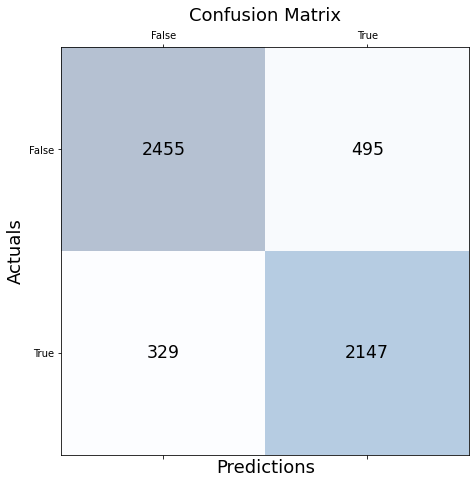

In [84]:
# Create a confusion matrix to visualise the performance
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1])
ax.set_yticklabels(target_names)

plt.show()

In [85]:
# Assess feature importance
sorted(zip(model.feature_importances_, feature_names), reverse=True)

[(0.7436620651481411, 'mo2climb'),
 (0.11720464684813674, 'calcage'),
 (0.07562959294867617, 'citizen'),
 (0.017774277412656147, 'stdrte'),
 (0.017546428643079585, 'new_route'),
 (0.01078250469002405, 'sex'),
 (0.007148923071354954, 'mo2sleep'),
 (0.005918176961689628, 'nohired'),
 (0.0026805703110070896, 'mo2used'),
 (0.0014723825055233477, 'mo2descent'),
 (0.00018043145971117545, 'msolo')]

In [86]:
# Assess if model performance improved by dropping lower performing features
# Drop lower scoring features from X and re run the model

X2 = X.drop(['msolo'], axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=42)
X2_scaler = MinMaxScaler().fit(X2_train)
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

# Decision Tree Classifier
model2 = tree.DecisionTreeClassifier()
model2 = model2.fit(X2_train_scaled, y2_train)

print(f"Training Data Score: {model2.score(X2_train_scaled, y2_train)}")
print(f"Testing Data Score: {model2.score(X2_test_scaled, y2_test)}")

###############################################
# Not improved, therefore these features kept #

Training Data Score: 0.9294009216589861
Testing Data Score: 0.8479542941393291


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [87]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = { 'criterion':['gini','entropy'],
               'splitter':['best', 'random'],
               'max_depth': np.arange(3, 15)}
dtree_model = tree.DecisionTreeClassifier()              
grid = GridSearchCV(dtree_model, param_grid, cv=5)

In [88]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'splitter': ['best', 'random']})

In [89]:
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Training Score: {grid.best_score_}")


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
Best Training Score: 0.8798771121351766


In [90]:
print(f"Testing Score: {grid.score(X_test_scaled, y_test)}")

Testing Score: 0.8722816070770365


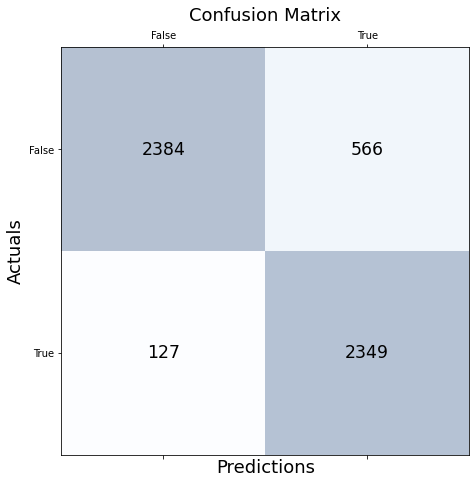

In [91]:
# Create a confusion matrix to visualise the performance of the optimised model
predictions = grid.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1])
ax.set_yticklabels(target_names)

plt.show()

# Save the Model

In [164]:
# Save the model
import joblib
filename = 'Model 1 - Decision_Tree.pkl'
joblib.dump(grid, filename)

['Model 1 - Decision_Tree.pkl']